In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/'My Drive'/

/content/gdrive/My Drive


# **Лабораторная работа №2**
**Максимов Антон 17ПМИ**

##**Задание 1**

- 1ый столбец - возраст человека
- 2ой столбец - количество иждевенцев в семье (детей/инвалидов/пенсионеров)
- 3ий столбец - средний ежемесячный доход за последние 12 месяцев
- 4ый столбец - кол-во лет, прожитых в текушем регионе
- 5ый столбец - средний ежемесячный расход за последние 12 месяце
- 6ой столбец - размер запрашиваемого кредита

Нужно выбрать один файл (номер совпадает с номером группы из первой лабораторной, если такого нет - выбирайте любой) и провести Principal Component Analysis для этих данных. В результате анализа нужно дать обоснование количеству выбранных главных компонент, дать интерпретацию выбранных главных компонент на основе описаний столбцов. Две первые главные компоненты нарисовать точками на плоскости.


Был выбран файл pmi-5

In [0]:
df = pd.read_excel('pmi_5.xls')

In [82]:
df

,Age,Ijdevenc,AvgProfit,YearsInRegion,AvgExpense,Credit
0,38,2,22600,8,22000,223000
1,47,2,11200,14,12000,119000
2,39,2,22500,9,22000,224000
3,51,3,16000,17,18000,173000
4,41,2,5900,11,6000,57000
...,...,...,...,...,...,...
65,39,2,10900,10,11000,107000
66,20,-1,9900,-2,6000,72000
67,29,1,20700,3,18000,193000
68,39,2,23700,9,24000,237000


Как мы видим, в строке 66 есть отрицательные значения, избавимся от этой строки

In [0]:
data = df.drop([66])

In [84]:
data.describe()

,Age,Ijdevenc,AvgProfit,YearsInRegion,AvgExpense,Credit
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,40.275362,2.115942,20146.376812,10.130435,20217.391304,201869.565217
std,7.759025,0.963087,9996.816842,4.838306,9853.141579,99512.031942
min,26.000000,0.000000,2600.000000,2.000000,2000.000000,19000.000000
25%,35.000000,2.000000,11400.000000,7.000000,12000.000000,122000.000000
50%,39.000000,2.000000,20700.000000,9.000000,20000.000000,200000.000000
75%,47.000000,3.000000,27100.000000,14.000000,27000.000000,266000.000000
max,60.000000,5.000000,40300.000000,22.000000,43000.000000,422000.000000


In [85]:
data.corr()

,Age,Ijdevenc,AvgProfit,YearsInRegion,AvgExpense,Credit
Age,1.000000,0.877315,-0.271190,0.993248,-0.127366,-0.180111
Ijdevenc,0.877315,1.000000,0.119032,0.839350,0.256107,0.206696
AvgProfit,-0.271190,0.119032,1.000000,-0.356740,0.988848,0.995615
YearsInRegion,0.993248,0.839350,-0.356740,1.000000,-0.215921,-0.268077
AvgExpense,-0.127366,0.256107,0.988848,-0.215921,1.000000,0.998223
Credit,-0.180111,0.206696,0.995615,-0.268077,0.998223,1.000000


Видно, что количество иждевенцев коррелирует с количеством лет прожитом в данном регионе

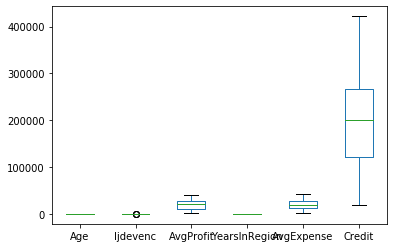

In [86]:
data.plot.box()

Также, очевидно, что данные нуждаются в автошкалировании

**Нормализуем и отцентрируем данные**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

После автошкалирования среднее значение всех переменных становится равно нулю, а отклонение – единица.

In [88]:
np.std(scaled_data, axis=0)

array([1., 1., 1., 1., 1., 1.])

In [89]:
np.mean(scaled_data,axis=0)

array([ 1.54465812e-16, -7.07968306e-17, -8.84960382e-17,  3.53984153e-17,
       -1.44007189e-16,  6.83833022e-17])

In [90]:
scaled_data.shape

(69, 6)

###**Principal Component Analysis**

Для начала выберем число компонент рандомно, например, 2

In [0]:
pca = PCA(n_components = 2)

In [92]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

Информативность каждой комноненты

In [0]:
pca.explained_variance_ratio_

array([0.54844139, 0.44100213])

In [0]:
pc1

array([-0.35062272, -0.15451267,  0.50420634, -0.38743225,  0.46611798,
        0.481244  ])

In [0]:
pc2

array([0.4700067 , 0.57760163, 0.24816614, 0.43269913, 0.32729211,
       0.29922393])

Посмотрим, как выглядит общая информативность компонент, в зависимости от их количества

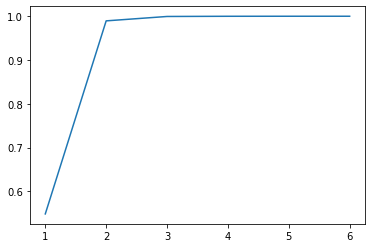

In [93]:
summi = []
x = []
for i in range(1,7):
  pca = PCA(n_components = i)
  pca.fit(scaled_data)
  summi.append(pca.explained_variance_ratio_.sum())
  x.append(i)
y = summi
plt.plot(x, y)

Если мы транспонируем наши данные, график практически не изменится, изменятся shape`ы компонент и перераспределится их информативность, однако это **не сильно повлияет** на результат

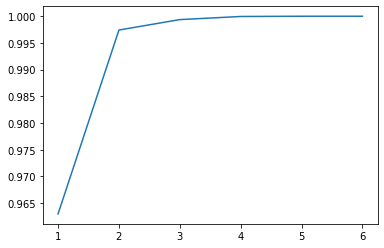

In [0]:
summi = []
x = []
for i in range(1,7):
  pca = PCA(n_components = i)
  pca.fit(scaled_data.T)
  summi.append(pca.explained_variance_ratio_.sum())
  x.append(i)
y = summi
plt.plot(x, y)

In [0]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
pca.explained_variance_ratio_

array([0.54844139, 0.44100213])

In [0]:
pca = PCA(n_components = 2)
pca.fit(scaled_data.T)
pca.explained_variance_ratio_

array([0.96296639, 0.03444876])

Наибольшая информативность, если число компонент 2 или более

In [0]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
pca.explained_variance_ratio_

array([0.54844139, 0.44100213, 0.01003097])

Однако, если мы выберем число больше 2, тогда следующие компоненты почти не будут нести в себе информацию, поэтому оставим n_components = 2

In [0]:
pca = PCA(n_components = 2)
x_new = pca.fit_transform(scaled_data)

**Главные факторы:**

In [0]:
x_new

array([[ 6.06700930e-01, -2.15804331e-01],
       [-1.84930999e+00, -6.07946123e-02],
       [ 4.80309048e-01, -6.41696318e-02],
       [-1.64214083e+00,  1.54203329e+00],
       [-2.19142403e+00, -1.21826207e+00],
       [ 2.43656823e+00,  2.13756703e+00],
       [ 2.27361623e+00, -7.72558486e-01],
       [-1.85746734e+00,  2.66032011e+00],
       [ 2.01686827e+00, -1.65342865e+00],
       [ 1.45263722e+00, -1.12334541e-01],
       [ 2.21171103e-01, -2.42012156e+00],
       [ 6.14368118e-01, -3.51922998e+00],
       [ 3.34890122e+00,  5.75330395e-01],
       [-2.07403099e+00, -5.15098149e-01],
       [ 7.38842200e-01, -1.35078373e-01],
       [ 2.50111456e+00,  1.85827521e+00],
       [-2.34907003e+00,  5.70011191e-01],
       [ 3.09284954e+00, -8.25813686e-01],
       [-2.76816520e+00, -7.94123820e-01],
       [-2.73347513e+00, -1.09000438e+00],
       [ 1.98649207e+00,  2.12541627e-01],
       [ 1.24662864e+00, -4.93647604e-03],
       [-2.35306358e+00,  7.96313967e-01],
       [ 1.

**Построим на плоскости:**

Text(0, 0.5, 'Second Principal Component')

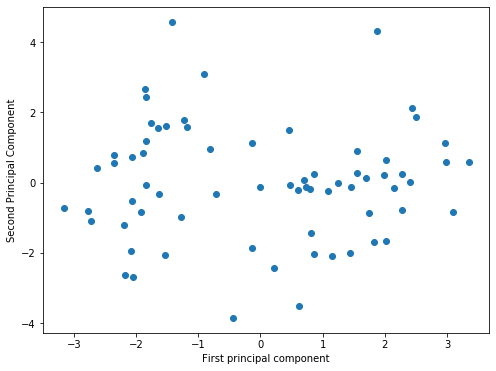

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(x_new[:,0],x_new[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


**Чтобы понять что обозначают эти факторы, построим Loadings Plot и Score Plot = Biplot**

Также использем возраст в качестве точек (можно выбрать и другой признак)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


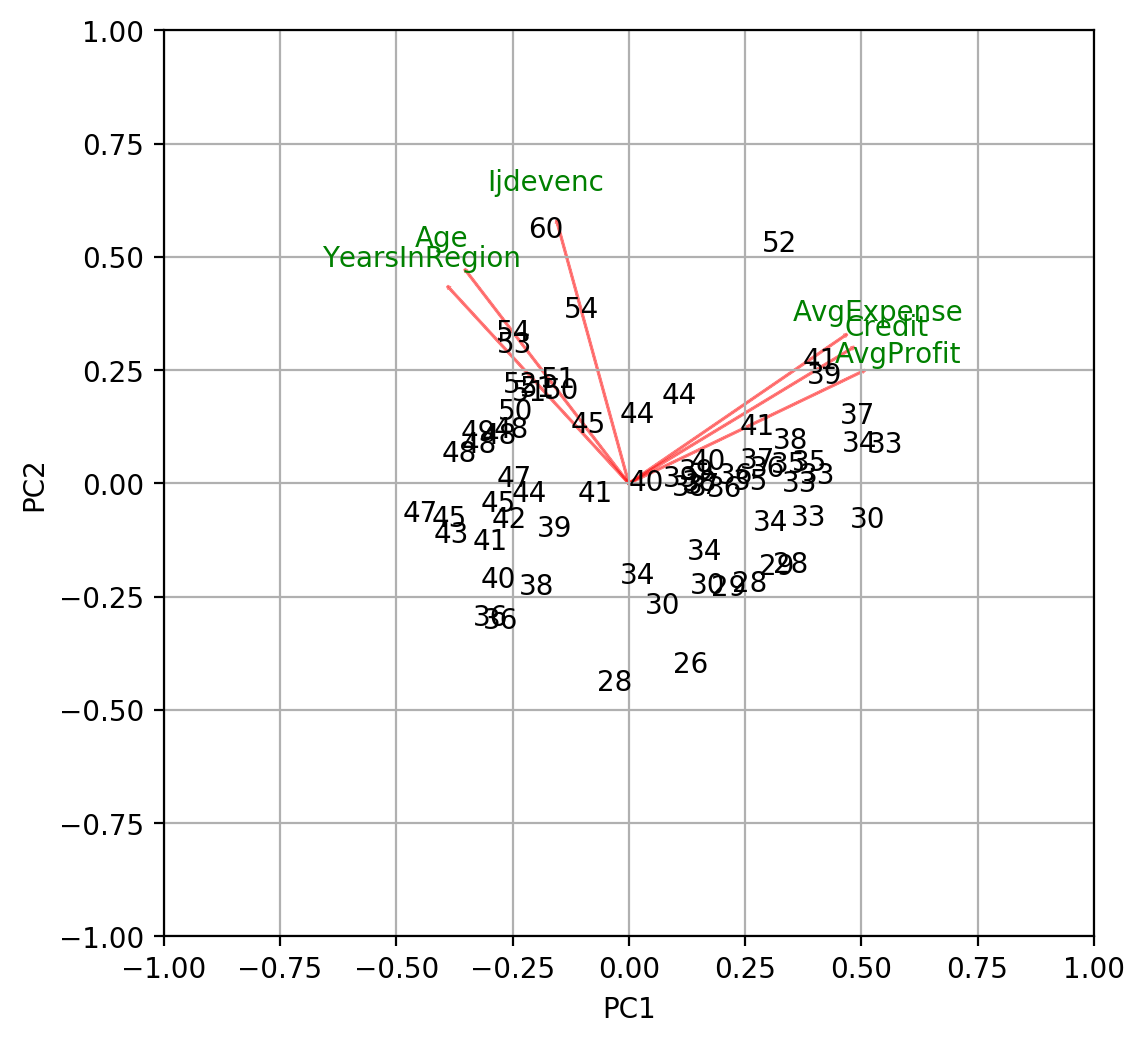

In [0]:
def biplot(score,coeff,labels=None, lab=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    if lab is None:
        plt.scatter(xs*scalex,ys*scaley)
    else:
        for i in range(len(xs)):
            plt.text(xs[i]*scalex,ys[i]*scaley, lab[i])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(6,6),dpi=200)
biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), data.columns, data['Age'].as_matrix())
plt.show()


**Проекции векторов признаков на оси показывают какую долю "весов", занимает каждый признак в соответсвующей компоненте. Также, чем меньше угол между векторами, тем больше эти признаки коррелируют**

**Так например, средний ежемесячный доход за последние 12 месяцев, средний ежемесячный расход за последние 12 месяцев, размер запрашиваемого кредита имеют большее "влияние" на PC1 и коррелируют между собой, следовательно первый фактор можно назвать, как "индекс платежеспособности"**

**Аналогично, другие три признака характеризуют "индекс надежности", то есть насколько эти люди привязаны к региону Можно увидеть, что большинство этих людей старше 40**


**SVD**

In [0]:
U, S, Vt = randomized_svd(scaled_data, n_components = 2)

In [0]:
U

array([[ 4.02633010e-02, -1.59712771e-02],
       [-1.22728219e-01, -4.49929615e-03],
       [ 3.18753884e-02, -4.74907507e-03],
       [-1.08979577e-01,  1.14123015e-01],
       [-1.45432388e-01, -9.01613090e-02],
       [ 1.61701219e-01,  1.58197359e-01],
       [ 1.50887019e-01, -5.71756162e-02],
       [-1.23269577e-01,  1.96885341e-01],
       [ 1.33848113e-01, -1.22367178e-01],
       [ 9.64032965e-02, -8.31367040e-03],
       [ 1.46778722e-02, -1.79108694e-01],
       [ 4.07721288e-02, -2.60451664e-01],
       [ 2.22247587e-01,  4.25791322e-02],
       [-1.37641678e-01, -3.81214557e-02],
       [ 4.90327680e-02, -9.99689908e-03],
       [ 1.65984793e-01,  1.37527491e-01],
       [-1.55894460e-01,  4.21854678e-02],
       [ 2.05254889e-01, -6.11169345e-02],
       [-1.83707430e-01, -5.87716265e-02],
       [-1.81405247e-01, -8.06691963e-02],
       [ 1.31832216e-01,  1.57298104e-02],
       [ 8.27316752e-02, -3.65339408e-04],
       [-1.56159489e-01,  5.89337152e-02],
       [ 1.

**Сингулярные числа**

In [0]:
S

array([15.06833554, 13.51202728])

**Квадраты сингулярных чисел**

In [0]:
print(S[0]**2)
print(S[1]**2)

227.05473602744132
182.57488120877


**Вклад главных факторов**

In [0]:
S[0]**2/np.dot(S,S)

0.5542927719909254

In [0]:
S[1]**2/np.dot(S,S)

0.44570722800907464

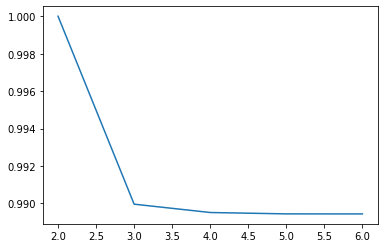

In [0]:
summi = []
x = []
for i in range(2,7):
  U, S, Vt = randomized_svd(scaled_data, n_components = i)
  summi.append(S[0]**2/np.dot(S,S)+S[1]**2/np.dot(S,S))
  x.append(i)
y = summi
plt.plot(x, y)

Две компоненты самое оптимальное

Text(0, 0.5, 'Second Component')

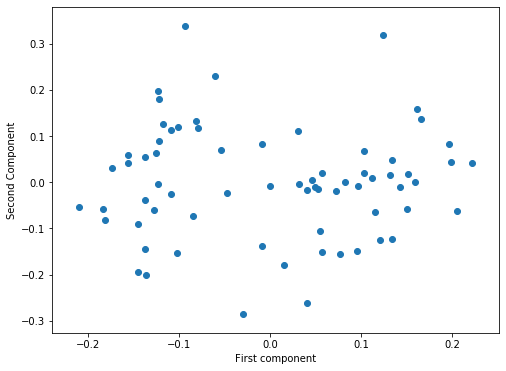

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(U[:,0],U[:,1])
plt.xlabel('First component')
plt.ylabel('Second Component')

**Графики практически идентичны с PCA, так как SVD разложение связано с PCA соотношением T=US**

In [0]:
U*S

array([[ 6.06700930e-01, -2.15804331e-01],
       [-1.84930999e+00, -6.07946123e-02],
       [ 4.80309048e-01, -6.41696318e-02],
       [-1.64214083e+00,  1.54203329e+00],
       [-2.19142403e+00, -1.21826207e+00],
       [ 2.43656823e+00,  2.13756703e+00],
       [ 2.27361623e+00, -7.72558486e-01],
       [-1.85746734e+00,  2.66032011e+00],
       [ 2.01686827e+00, -1.65342865e+00],
       [ 1.45263722e+00, -1.12334541e-01],
       [ 2.21171103e-01, -2.42012156e+00],
       [ 6.14368118e-01, -3.51922998e+00],
       [ 3.34890122e+00,  5.75330395e-01],
       [-2.07403099e+00, -5.15098149e-01],
       [ 7.38842200e-01, -1.35078373e-01],
       [ 2.50111456e+00,  1.85827521e+00],
       [-2.34907003e+00,  5.70011191e-01],
       [ 3.09284954e+00, -8.25813686e-01],
       [-2.76816520e+00, -7.94123820e-01],
       [-2.73347513e+00, -1.09000438e+00],
       [ 1.98649207e+00,  2.12541627e-01],
       [ 1.24662864e+00, -4.93647604e-03],
       [-2.35306358e+00,  7.96313967e-01],
       [ 1.

In [0]:
x_new

array([[ 6.06700930e-01, -2.15804331e-01],
       [-1.84930999e+00, -6.07946123e-02],
       [ 4.80309048e-01, -6.41696318e-02],
       [-1.64214083e+00,  1.54203329e+00],
       [-2.19142403e+00, -1.21826207e+00],
       [ 2.43656823e+00,  2.13756703e+00],
       [ 2.27361623e+00, -7.72558486e-01],
       [-1.85746734e+00,  2.66032011e+00],
       [ 2.01686827e+00, -1.65342865e+00],
       [ 1.45263722e+00, -1.12334541e-01],
       [ 2.21171103e-01, -2.42012156e+00],
       [ 6.14368118e-01, -3.51922998e+00],
       [ 3.34890122e+00,  5.75330395e-01],
       [-2.07403099e+00, -5.15098149e-01],
       [ 7.38842200e-01, -1.35078373e-01],
       [ 2.50111456e+00,  1.85827521e+00],
       [-2.34907003e+00,  5.70011191e-01],
       [ 3.09284954e+00, -8.25813686e-01],
       [-2.76816520e+00, -7.94123820e-01],
       [-2.73347513e+00, -1.09000438e+00],
       [ 1.98649207e+00,  2.12541627e-01],
       [ 1.24662864e+00, -4.93647604e-03],
       [-2.35306358e+00,  7.96313967e-01],
       [ 1.

**Итак мы получили два главных фактора: индекс платежеспособности и индекс надежности, переведем в шкалу 0-9**

In [0]:
x_new[:,0]

array([ 6.06700930e-01, -1.84930999e+00,  4.80309048e-01, -1.64214083e+00,
       -2.19142403e+00,  2.43656823e+00,  2.27361623e+00, -1.85746734e+00,
        2.01686827e+00,  1.45263722e+00,  2.21171103e-01,  6.14368118e-01,
        3.34890122e+00, -2.07403099e+00,  7.38842200e-01,  2.50111456e+00,
       -2.34907003e+00,  3.09284954e+00, -2.76816520e+00, -2.73347513e+00,
        1.98649207e+00,  1.24662864e+00, -2.35306358e+00,  1.87030517e+00,
       -2.06467416e+00, -2.07662668e+00,  2.96190651e+00,  8.17787088e-01,
        1.74063930e+00,  2.99084719e+00, -1.23555578e+00, -1.63674942e+00,
       -4.50330636e-01, -7.15021946e-01, -1.92118295e+00,  8.54546825e-01,
        1.55313703e+00, -1.33720099e-01, -1.83995316e+00,  1.44320507e+00,
       -1.53478473e+00,  2.02339049e+00,  1.81909360e+00, -9.08793538e-01,
        2.40127337e+00,  7.89442896e-01, -2.62351381e+00,  4.59847275e-01,
       -1.84352171e+00, -1.52482311e+00, -2.18427678e+00,  1.56004051e+00,
       -1.18667326e+00, -

In [0]:
Itog = x_new

In [0]:
def normalize(list, range): 
  l = np.array(list) 
  a = np.max(l)
  c = np.min(l)
  b = range[1]
  d = range[0]

  m = (b - d) / (a - c)
  pslope = (m * (l - c)) + d
  return pslope

In [0]:
ranget = [0,9]

In [0]:
itog1 = np.round(normalize(x_new[:,0], ranget))

In [0]:
itog2 = np.round(normalize(x_new[:,1], ranget))

In [0]:
itog1.astype(int)
itog2.astype(int)
Itog[:,0]=itog1
Itog[:,1]=itog2
Itogi = {'Индекс платежеспособности': itog1 , 'Индекс надежности': itog2}
Itogi = pd.DataFrame(data = Itogi)

In [0]:
Itogi

,Индекс платежеспособности,Индекс надежности
0,5.0,4.0
1,2.0,4.0
2,5.0,4.0
3,2.0,6.0
4,1.0,3.0
...,...,...
64,2.0,9.0
65,3.0,3.0
66,6.0,2.0
67,5.0,4.0


##**Задание 2**

2. Взять данные из предыдущей лабы по той же группе (очищенные от выбросов/плохих ответов студентов) и провести анализ главных компонент. Дать обоснование количеству выбранных главных компонент, дать им интерпретацию.

In [0]:
data = pd.read_csv('turkiye-student-evaluation_generic.csv', header=0)
data5=data[data['class']==5]
newdata5=data5[data5['attendance']>0]
newdata5.shape


(447, 33)

In [0]:
newdata5

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
3310,3,5,3,1,3,3,3,3,4,4,4,4,4,4,4,4,3,4,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3311,3,5,2,1,3,2,4,3,3,4,5,3,4,2,3,3,2,3,4,4,2,4,3,3,4,4,4,2,3,4,3,3,4
3312,3,5,1,3,2,3,3,2,3,3,4,4,2,3,3,4,5,3,4,4,2,4,2,3,2,3,4,3,2,3,3,3,2
3313,3,5,2,3,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,4,1,1,1,1,1,1,1,4,1,1,1
3316,3,5,2,3,3,4,4,2,4,4,4,4,3,4,3,4,3,1,1,4,4,4,3,4,4,4,4,4,2,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,3,5,1,2,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3962,3,5,1,2,4,1,1,1,1,1,1,1,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3963,3,5,1,4,4,5,3,4,3,5,3,4,4,3,5,3,4,5,4,3,3,4,5,4,3,3,4,5,5,4,3,4,5
3964,3,5,1,1,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [0]:
newdata5.corr()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb.repeat,NaN,NaN,1.000000,-0.096530,-0.019105,-0.025854,0.003163,-0.008666,-0.032228,-0.016980,0.005395,0.018661,0.055543,0.021437,0.025424,0.054730,0.044312,-0.035946,-0.043902,-0.018233,0.010898,-0.009186,0.005191,-0.019434,-0.025883,0.004624,-0.009095,-0.033990,0.012080,-0.017752,0.013871,0.006677,0.024199
attendance,NaN,NaN,-0.096530,1.000000,-0.048906,0.039124,0.052935,0.043463,0.080332,0.036880,0.044938,0.056306,0.032422,0.105068,0.046181,0.094980,0.055959,0.044394,0.043567,0.050588,0.014739,0.081061,0.028247,0.058870,0.030100,0.068837,0.061436,0.080221,0.034862,0.038816,0.015401,0.015915,0.044617
difficulty,NaN,NaN,-0.019105,-0.048906,1.000000,0.033876,0.036171,-0.014318,0.016509,-0.013153,-0.028189,-0.030087,-0.017255,0.002627,-0.029155,-0.066828,-0.069963,-0.001455,0.029005,-0.005600,-0.008659,0.043115,0.007025,-0.004587,0.034927,-0.000752,0.020486,-0.004913,0.020485,0.041389,-0.037184,-0.015752,0.025848
Q1,NaN,NaN,-0.025854,0.039124,0.033876,1.000000,0.792773,0.704142,0.772455,0.728073,0.634008,0.720380,0.710011,0.719226,0.698490,0.665664,0.695053,0.618683,0.544011,0.543386,0.664120,0.480677,0.633667,0.599542,0.596282,0.580919,0.570136,0.657086,0.629931,0.559390,0.578354,0.626639,0.526368
Q2,NaN,NaN,0.003163,0.052935,0.036171,0.792773,1.000000,0.816315,0.790970,0.793174,0.753268,0.737959,0.733489,0.740173,0.743606,0.726346,0.712245,0.733244,0.682889,0.677527,0.761927,0.607969,0.707260,0.716552,0.729223,0.698726,0.711171,0.727607,0.694861,0.703834,0.715528,0.706973,0.653538
Q3,NaN,NaN,-0.008666,0.043463,-0.014318,0.704142,0.816315,1.000000,0.770706,0.816462,0.788802,0.764170,0.765768,0.747079,0.782216,0.735540,0.721971,0.724754,0.676286,0.661861,0.747348,0.575627,0.704503,0.673521,0.719046,0.688341,0.729323,0.721439,0.729885,0.708576,0.698724,0.703765,0.668608
Q4,NaN,NaN,-0.032228,0.080332,0.016509,0.772455,0.790970,0.770706,1.000000,0.786963,0.758140,0.734808,0.699564,0.693019,0.710301,0.638146,0.659530,0.716026,0.688326,0.680952,0.708741,0.626120,0.671703,0.677498,0.700024,0.695857,0.677142,0.678855,0.661669,0.656940,0.701196,0.664366,0.661044
Q5,NaN,NaN,-0.016980,0.036880,-0.013153,0.728073,0.793174,0.816462,0.786963,1.000000,0.853336,0.825867,0.807863,0.736682,0.795776,0.732504,0.718816,0.777434,0.735413,0.725278,0.827191,0.631373,0.770916,0.757997,0.743623,0.729729,0.755202,0.782953,0.774873,0.759347,0.736697,0.746524,0.693814


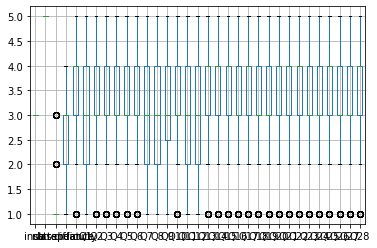

In [0]:
newdata5.boxplot()

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(newdata5)
scaled_data_q = scaler.transform(newdata5)

In [0]:
np.std(scaled_data_q, axis=0)

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
np.mean(scaled_data_q,axis=0)

array([ 0.00000000e+00,  0.00000000e+00,  1.03322769e-16,  9.53748639e-17,
        7.94790532e-17, -3.97395266e-17, -9.83553284e-17,  8.34530059e-17,
       -1.19218580e-17,  1.29153461e-16,  3.57655739e-17,  5.96092899e-18,
       -1.27166485e-16, -1.19218580e-16,  3.97395266e-17,  7.15311479e-17,
       -2.58306923e-17,  1.31140438e-16, -1.58958106e-16,  1.58958106e-16,
       -6.35832426e-17, -4.76874319e-17,  1.90749728e-16, -1.35114390e-16,
       -1.66906012e-16, -1.58958106e-17, -4.76874319e-17,  1.19218580e-17,
       -3.17916213e-17,  5.56353373e-17, -3.17916213e-17,  8.74269585e-17,
       -2.38437160e-17])

In [0]:
pca = PCA(n_components = 2)
pca.fit(scaled_data_q)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
scaled_data_q.shape

(447, 33)

In [0]:
pca.explained_variance_ratio_

array([0.66461741, 0.06068548])

**График зависимости количества компонент от информативности**

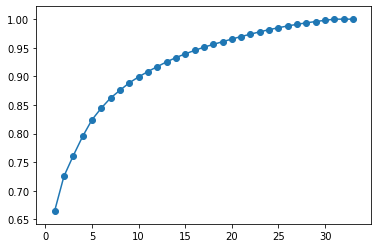

In [34]:
summ = []
t = []

for j in range(1,34):
  pca = PCA(n_components = j)
  pca.fit(scaled_data_q)
  summ.append(pca.explained_variance_ratio_.sum())
  t.append(j)
k = summ
plt.plot(t, k)
plt.scatter(t, k)  

**График собственных значений**

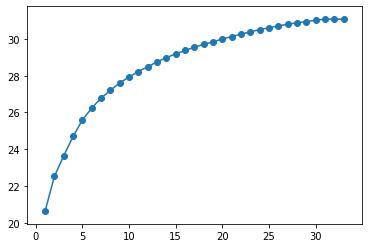

In [36]:
summ = []
t = []

for j in range(1,34):
  pca = PCA(n_components = j)
  pca.fit(scaled_data_q)
  summ.append(pca.explained_variance_.sum())
  
  
  t.append(j)
k = summ
plt.plot(t, k)
plt.scatter(t, k)  

По графикам сложно сказать какое число компонент нужно выбрать, поэтому воспользуемся **правилом Кайзера**: Если данные нормированы на единичную выборочную дисперсию по осям, то правило Кайзера приобретает особо простой вид: значимы только те главные компоненты, для которых ${\displaystyle \lambda _{i}>1.}$

In [60]:
pca = PCA(n_components = 5)
x_new = pca.fit_transform(scaled_data_q)
pca.explained_variance_ratio_.sum()
pca.explained_variance_

array([20.64933501,  1.88546787,  1.11871429,  1.0428472 ,  0.90290968])

**Очевидно, оптимальное кол-во компонент - 4**

In [0]:
pca = PCA(n_components = 4)
x_new = pca.fit_transform(scaled_data_q)

Text(0, 0.5, 'Second Principal Component')

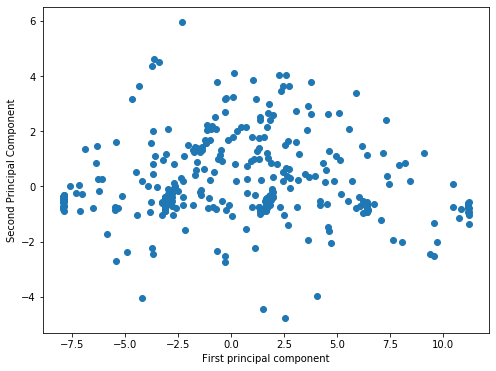

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x_new[:,0],x_new[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

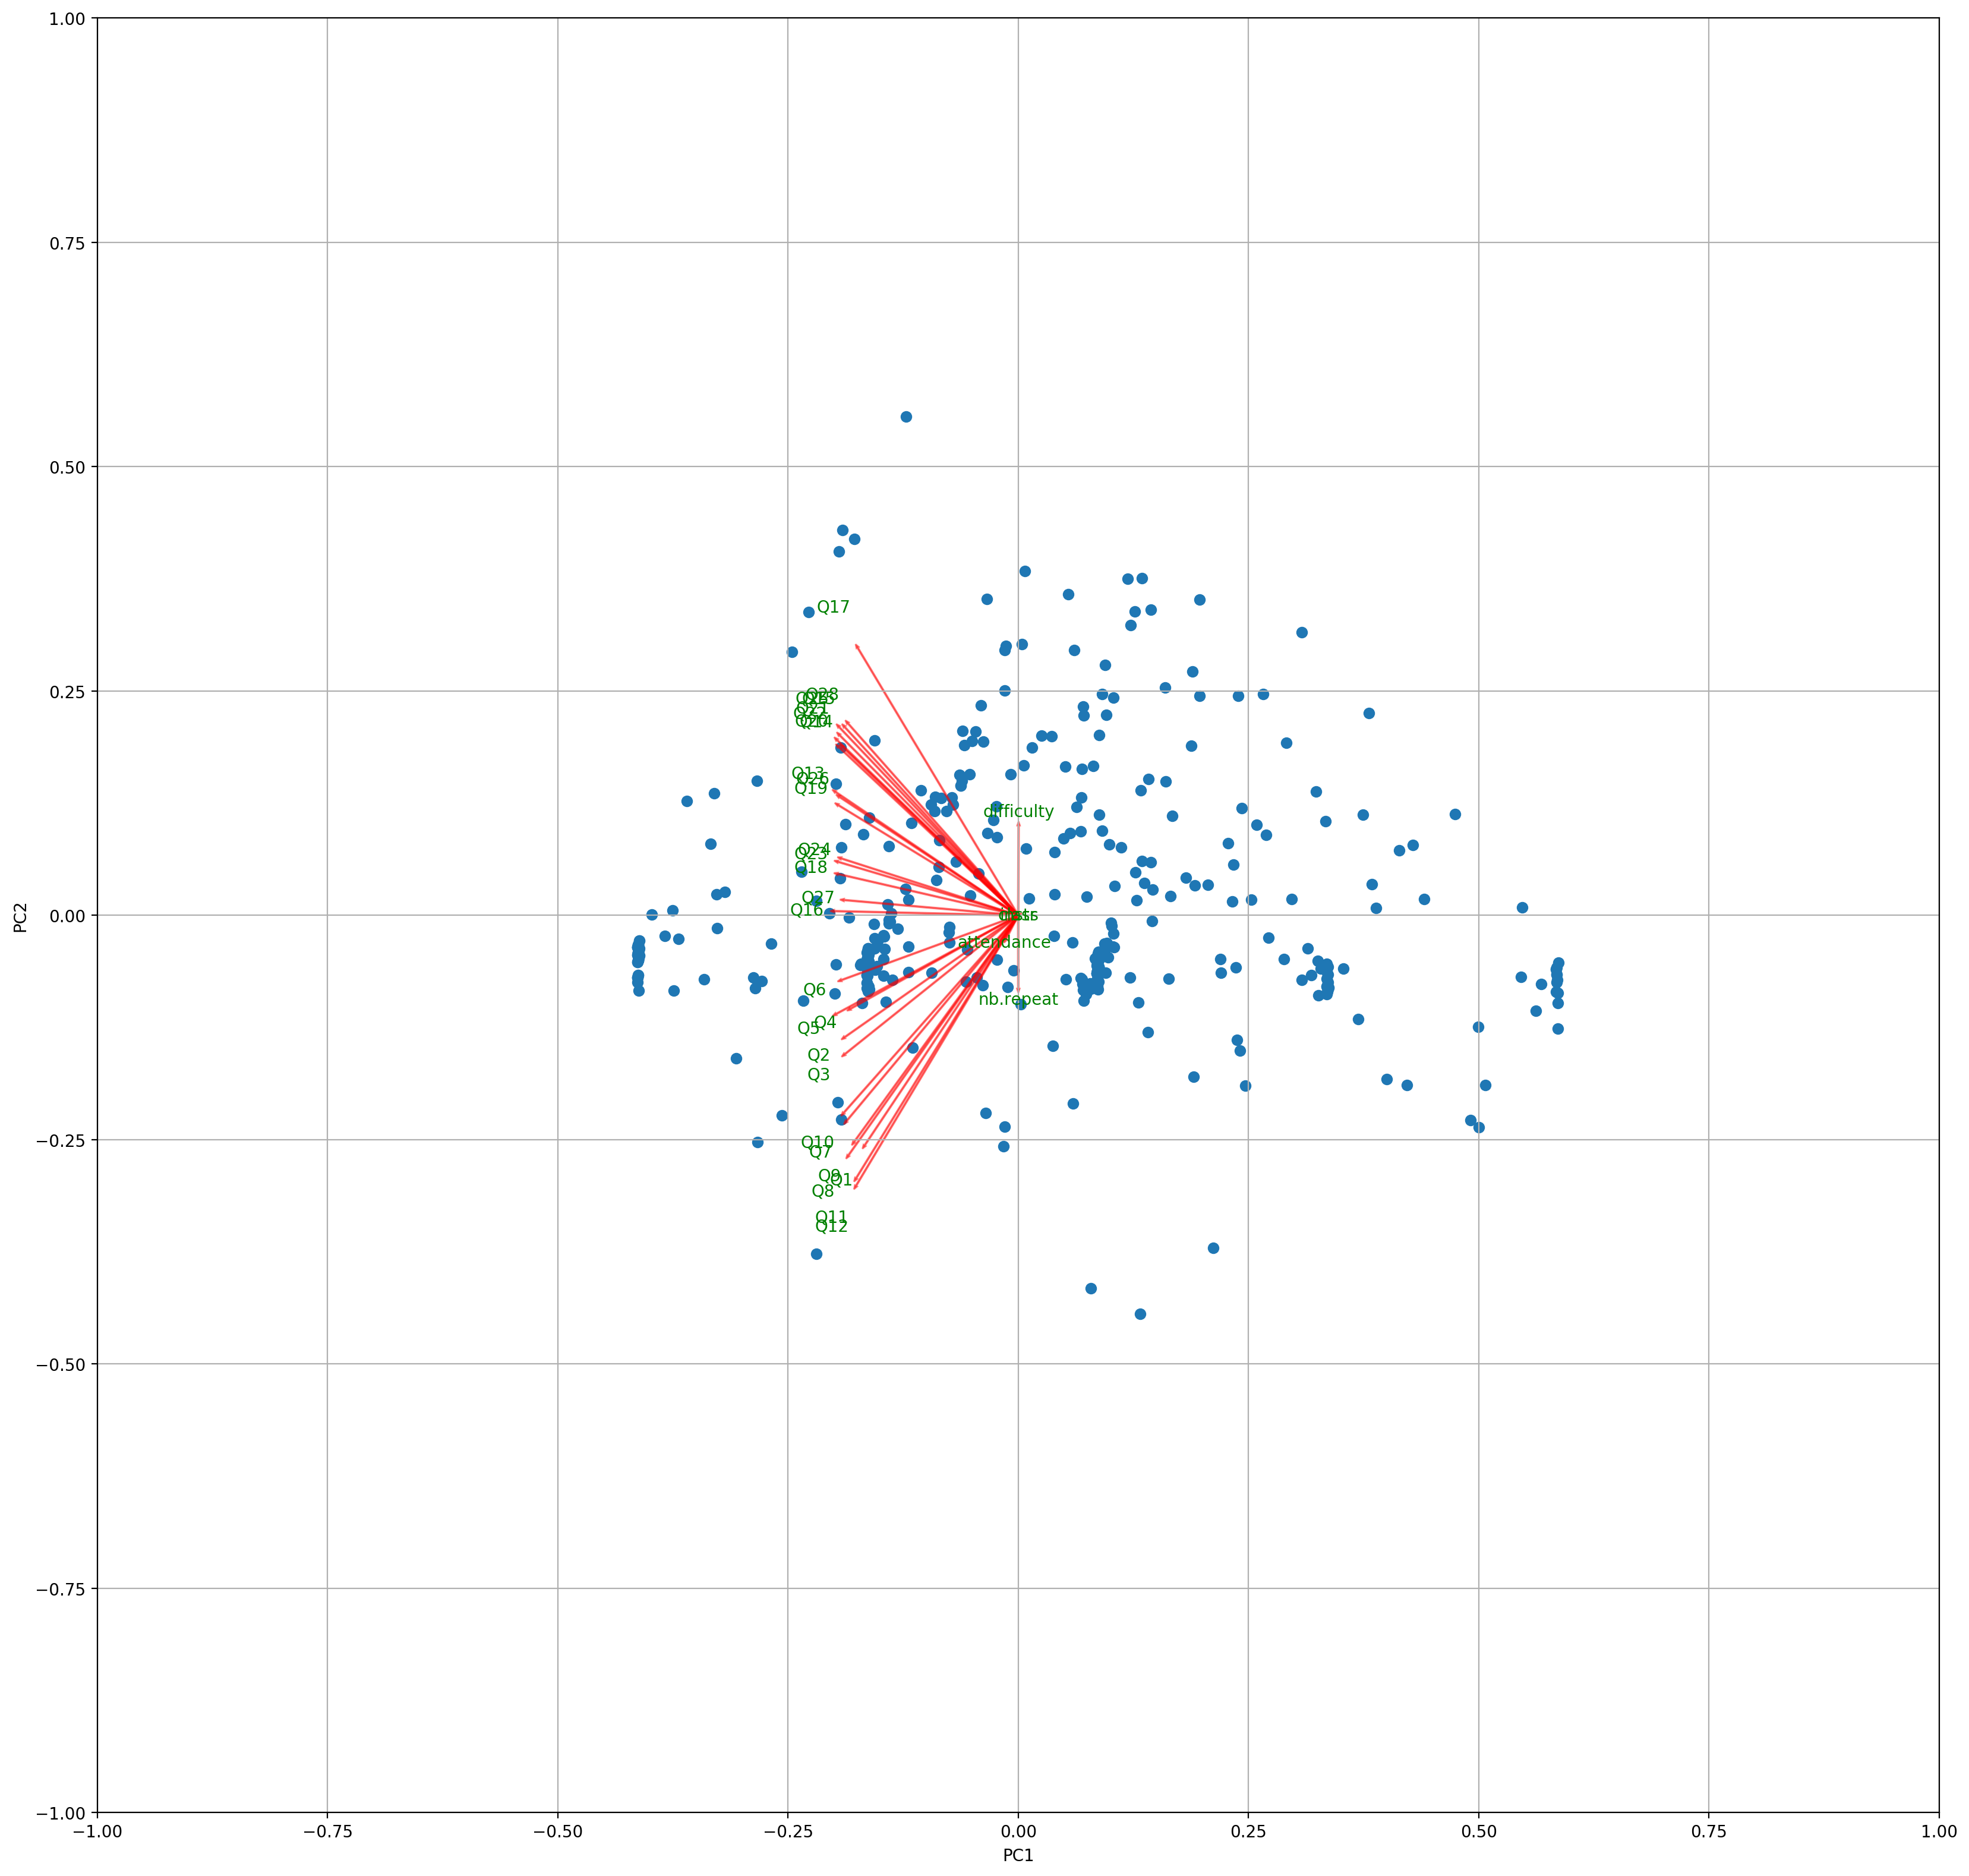

In [74]:
def biplot(score,coeff,labels=None, lab=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    if lab is None:
        plt.scatter(xs*scalex,ys*scaley)
    else:
        for i in range(len(xs)):
            plt.text(xs[i]*scalex,ys[i]*scaley, lab[i])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(20,20),dpi=200)
biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), newdata5.columns)
plt.show()

Можно заметить что вопросы Q17 и Q12 негативно коррелируют (угол между векторами приближен к 180)

Q17: Инструктор приехал вовремя на занятия.
Q12: Курс помог мне взглянуть на жизнь и мир с новой точки зрения. 

**Первый главный фактор отвечает за сам курс, то есть каким он должен быть, так как именно вопросы эти вопросы наиболее оказывают влияние на PC1, другие вопросы, например** 


Q17: Инструктор приехал вовремя на занятия. 


Q11: Курс был актуальным и полезным для моего профессионального развития. 


Q12: Курс помог мне взглянуть на жизнь и мир с новой точки зрения. 


Q8: Викторины, задания, проекты и экзамены способствовали оказанию помощи в обучении.  



**отвечают за другой фактор PC2 : инициативность и другие полезности во время курса (или наоборот) в зависимости от направления вектора**



Text(0, 0.5, 'Fourth Principal Component')

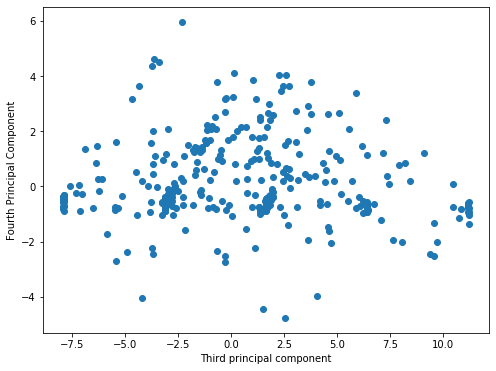

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x_new[:,0],x_new[:,1])
plt.xlabel('Third principal component')
plt.ylabel('Fourth Principal Component')

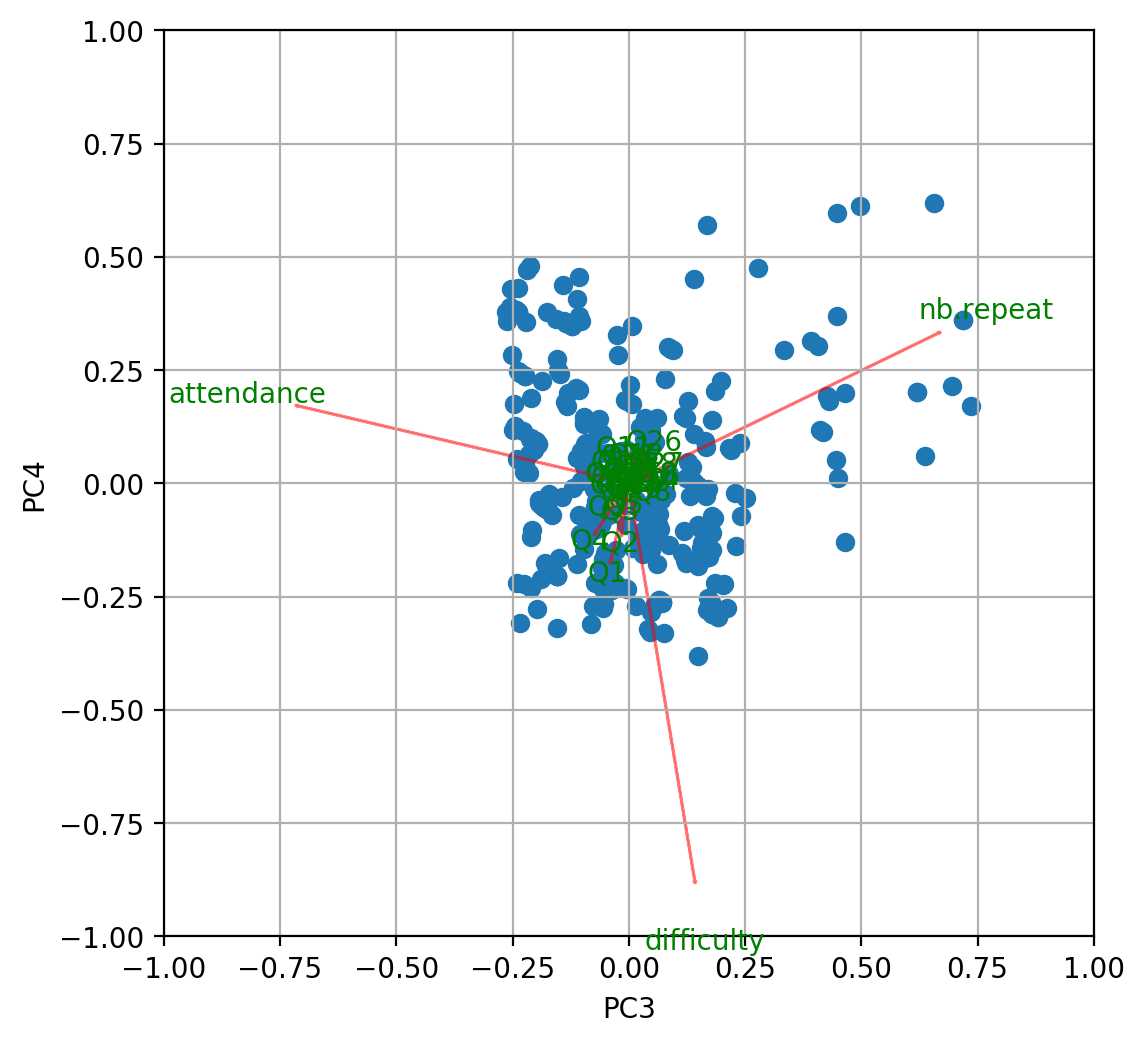

In [73]:
plt.figure(figsize=(6,6),dpi=200)
biplot(x_new[:,2:4],np.transpose(pca.components_[2:4,:]), newdata5.columns)
plt.xlabel("PC{}".format(3))
plt.ylabel("PC{}".format(4))
plt.show()

**Здесь уже более очевидно, 3-й фактор обозначает некий индекс присутствия на занятиях связанный с повторяемостью курса , а PC4 отвечает за легкость курса**

**Выводы:**

**1. Задание 1, главные факторы: индекс платежеспособности и надежности**

**2. Задание 2, главные факторы: аутентичность курса, (не)инициативность, индекс присутствия, легкость курса**



##**Доп.задание (не доделано)**

*. Дополнительное задание на +5 баллов (= +1 балл к итоговой за курс). Использовать алгоритм LSA для анализа датасета 20 News groups: его можно получить в пакете sklearn.datasets.fetch_20newsgroups. Критерии выполнения задания:
- Наличие кода
- Выбор количества главных компонент-топиков (возможно объяснение к чему относятся топики)
- Найти 2 синонима и расстояние между ними, два антонима и расстояние между ними
- Пример поиска ближайших документов по запросу из нескольких слов

X=U∑V^T -SVD
U - собств вектора

<br>$X^k = U_{k} * S_{k} * V^T_{k} = T_{k} * V^T_{k}$ </br>
<br>T - слова </br>
<br>$V^T_{k}$ - связь слов с векторами</br>

<br>Корпус  - набор текста</br>


<br>$X^k = V_{k} * S_{k} * U^T_{k} = D_{k} * U^T_{k}$</br>


In [0]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism','rec.sport.baseball','talk.politics.mideast','comp.graphics', 'sci.space']
dataset = fetch_20newsgroups(subset='train',categories=categories, remove=('headers', 'footers', 'quotes'))

In [5]:
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

2818 documents
5 categories


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

def latent_semantic_analysis(docs):
    tfidf = TfidfVectorizer() 
    tfidf.fit(docs) 
    vecs = tfidf.transform(docs)
    svd = TruncatedSVD(n_components=100) 
    svd.fit(vecs) 
    return svd.transform(vecs) 

In [0]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
vecs = latent_semantic_analysis(newsgroups_train.data)

In [9]:
vecs.shape

(11314, 100)

Text(0, 0.5, 'Second')

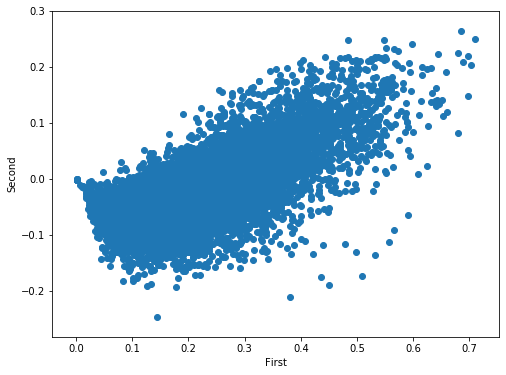

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(vecs[:,0],vecs[:,1])
plt.xlabel('First')
plt.ylabel('Second')